## Algoritmo Genetico

Los algoritmos geneticos son tecnicas de optimización metaheurísticas, tambien llamadas estocásticas o probabilísticas.

![Diagrama Algoritmo Genetico](./assets/DiagramaAg.png)



##### Ejemplo:

sea

$f(x,y)=\sqrt[]{x^{2}+y^{2}}$, en el dominio ${x,y}\in [-100,100]$



En este simple ejemplo, las variables independientes son $x$ e $y$, y la función objetivo o función de futness es $f(x,y)$. Un individuo, pues, debe codificar dichas variables independientes en una cadena cromosómica (infromación genética del individuo) en la que cada variable independiente corresponde a un gen. Así, en nuestro problema ejemplo, la cadena cromósomica estaría formada por dos genes al confinarse en forma de lista, quedarían como $[x_{i},y_{i}]$, con $i=1,...,n$ (siendo $n$ el numero de individuos que componen la población).


Individuo =$\begin{bmatrix}
x_{i} & y_{i}
\end{bmatrix}$

Poblacion =$\begin{bmatrix}
x_{1} & y_{1} \\ 
x_{2} & y_{2}\\ 
x_{3} & y_{3}\\ 
... & ...\\ 
x_{n-1} & y_{n-1}\\ 
x_{n} & y_{n}\\ 
\end{bmatrix}$

En principio, vamos a considerar que la población del algoritmo no cambia de tamaño a lo largo de las generaciones; por lo tanto, $n$ será constante.

$\textit{En los algoritmos genéticos tradicionales, el tamaño de la población es siempre constante. Además, un aspecto}$
$\textit{importante en los algoritmos genéticos es que la poblacón inicial, en la mayoria de los casos, se elige de manera aleatoria con}$
$\textit{el fin de partir de una diversidad amplia de individuos.}$
 


### Desarrollo

El primer paso que tenemos que hacer, es buscar un mecanismo para generar soluciones aleatorias a nuestro problema que difieran lo suficiente las unas de las otras.

##### Opción 1:

In [15]:
import random

#fijamos la semilla
random.seed(0)

#Generación de numeros aleatorios.
x = [random.uniform(-100,100) for i in range(10)]
y = [random.uniform(-100,100) for i in range(10)]

print(x)
print(y)

[68.88437030500961, 51.590880588060486, -15.885683833830996, -48.21664994140733, 2.254944273721705, -19.01317250991714, 56.75971780695451, -39.33745478421451, -4.680609169528836, 16.676407891006235]
[81.62257703906704, 0.9373711634780477, -43.63243112005924, 51.16084083144477, 23.67379933506632, -49.898731727511894, 81.94925119364802, 96.55709520753061, 62.04344719931791, 80.43319008791653]


##### Opción 2:

In [16]:
import numpy as np

#fijamos semilla
np.random.seed(0)

#generamos los numeros aleatorios.
x2=np.random.uniform(-100, 100, 10).reshape(1, 10)
y2=np.random.uniform(-100, 100, 10).reshape(1, 10)
print(x2)
print(y2)

[[  9.76270079  43.03787327  20.55267521   8.9766366  -15.26904013
   29.17882261 -12.48255775  78.35460016  92.7325521  -23.31169623]]
[[ 58.34500762   5.77898395  13.60891222  85.11932766 -85.79278836
  -82.57414006 -95.95632051  66.52396911  55.63135019  74.00242965]]


Volviendo al problema ejemplo, la idea es encontrar los valores que maximizan la función

$f(x,y)=\sqrt[]{x^{2}+y^{2}}$, para ${x,y}\in [-100,100]$

C:\Users\jonat\AppData\Local\Temp\ipykernel_8104\1928245812.py:23: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = figure_3d.gca(projection = "3d")


Text(0.5, 0.92, 'Representación de la función de optimización')

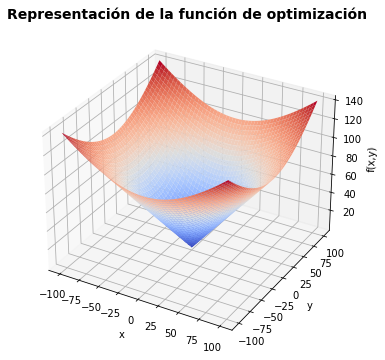

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def funcion_prueba(x):
    res = np.sqrt(x[0]**2 + x[1]**2)
    return res

#Generamos vectores que barran todo el dominio.
x = np.linspace(-100, 100, 1000)
y = np.linspace(-100, 100, 1000)

#Evaluamos todos los valores de las variables.
x_ax, y_ax = np.meshgrid(x, y)
vals = np.c_[x_ax.ravel(), y_ax.ravel()]
fx = np.reshape([funcion_prueba(val) for val in vals], (1000, 1000))



#Representamos los resultados obtenidos.
figure_3d = plt.figure(figsize =(8,6))
ax = figure_3d.gca(projection = "3d")

ax.plot_surface(x_ax, y_ax, fx, cmap=cm.coolwarm)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")
ax.set_title("Representación de la función de optimización",fontsize=14,fontweight="bold")

llegados a este punto, podemos empezar a codificar nuestro algoritmo genético utilizando el modulo **deap**

En esta sección se definen aspectos muy relevantes del algoritmo genético, como son 

1. El tipo de problema de optimización (maximizar o minimizar)

2. El tipo de objeto de Python o plantilla que va a contener el individuo (lista, vector, etc...) y sus atributos.

3. El objeto caja de herramientas o toolbox que contendra, mediante registro, un conjunto de funciones utilizadas por el algoritmo durante su ejecución. Entre los tipos de funciones que se registran en la caja de herramienta, destacan las siguientes:
    1. La función para crear los individuos de forma aleatoria
    2. La función para crear la población
    3. Los operadores genéticos (selección, cruce y mutación)
    4. La función objetivo

###### A continuación, mostramos un script que incluye las sentencias para realizar las 3 aspectos antes mencionadas. 

In [3]:
import random
from deap import base
from deap import creator
from deap import tools 

#creamos los objetos para definir el problema y el tipo de individuo.
creator.create("FitnessMax", base.Fitness, weights =(1.0,))
creator.create("Individual",list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

#Generación de genes.
toolbox.register("attr_uniform", random.uniform, -100, 100)

#Generación de individuos y población.
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_uniform, 2)
toolbox.register("population", tools.initRepeat, list, toolbox.individual, 30)

individuo = toolbox.individual()
poblacion = toolbox.population()

##### Creación del problema





Comenzamos con la creación del problema y, para ello, nos apoyamos en el metodo **create** de la clase **Creator**

                creator.create("FitnessMax", base.Fitness, weights =(1.0,))
                
El metodo **create** crea una nueva clase llamada **FitnessMax** (podemos darle el nombre que queramos)
que hereda de **base.Fitness** y que tiene un atributo que se denomina **weigths** 

 creator.create(Name, base, attribute)
 
 
 **weigths :** Este atributo es importante ya que indica el tipo de problemas de optimización que estamos definiendo. De forma genérica, weigths contendrá una tupla con tantas componentes como objetivos tenga el problema, y con un valor que indicara si estos objetivos son de maximización o minimización.
 
En nuestro ejemplo, el problema es de maximización de un solo objetivo. Esto es así porque la tupla solo tiene un elemento con valor de (1,0). Si el problema fuese de minimización con un solo objetivo, la tupla **weigths** contendra el valor de (-1,0). Por el contrario, si el problema fuera multiobjetivo, el atributo weigths tendría tantos unos o menos unos como objetivos se quieran definir para maximizar o minimizar. 

El objeto de base (base.Fitness) contiene los atributos encargados de almacenar el fitness o desempeño de un individuo. En concreto, el objeto base.Fitness contiene los siguientes atributos:

1. values: Es una tupla que contiene los valores de fitness de cada uno de los objetivos de nuestro problema. Vamos a empezar con problemas de un solo objetivo, pero este es solo un caso particular del problema mas general, que sera multiobjetivo. Así pues **values** contendra la calidad de cada individuo en cada uno de los objetivos de nuestro problema de optimización.

2. dominates: Devuelve verdadero (True) si una solución es estrictamente peor que la otra. Este atributo se utilizará en los algoritmos genéticos con múltiples objetivos.

3. valid: Indica si el fitness de un individuo es válido. Este atributo se utiliza para saber el número de individuos que se tiene que evaluar en cada iteración del algoritmo genético. En general, si un individuo tiene el atributo **values** vacío, el atributo **valid** sera False

Por lo tanto, la clase que estamos creando también tendrá disponibles estos tres atributos gracias a la propiedad de herencia de clases.

##### Creación de la plantilla del individuo

El metodo create se vuelve a utilizar, en este casdo para definir la clase que encapsula al individuo:

                    creator.create("Individual",list, fitness=creator.FitnessMax)
                    
En esta línea de código, estamos creando una clase que se denomina **Individual**, que hereda de la clase lista (por lo tanto, tiene todos los metodos de una lista) y que contiene el atributo fitness, el caul ha sido inicializado con el objeto **FitnessMax** creado en la anterior línea. Es decir, el individuo será una lista que tiene tiene un atributo fitness que almacenara la calidad o desempeño de este.  

Se puede observar que la operación que realiza creator es, simplemente, crear una nueva clase que hereda de otra y que tiene unos atributos que podemos indicar. En definitiva, en esta sentencia lo que se esta haciendo es crear la plantilla que contendra la información del individuo.

Definir los individuos como una lista nos permite poder acceder a cada uno de los genes mediante la posición que ocupa. Cada posición de la secuencia es una variable distinta. Así, volviendo a nuestro ejemplo, la primera posición será la variable $x$ y la segunda será la variable $y$

Ya hemos definido el **tipo de problema** y el **tipo de individuo** que vamos a utilizar. Estos dos pasos se van a dar siempre y, en la mayoría de los casos, ambas líneas de código se repitirán con pequeñas modificaciones dependiendo del número de objetivos y del tipo de objeto que almacene los individuos. 

Definir los individuos com una lista de variables es un procedimiento muy eficiente y flexible, ya que cada variable independiente será una posición de la lista. El tamaño de la lista se define cuando se crean los individuos de la población inicial.

##### Crear individuos aleatorios y población inicial

A continuación, debemos definir funciones que nos permitan crear individuos aleatorios y, en consecuencia, la población inicial.

La siguiente línea define un objeto toolbox de tipo **base.Toolbox** o caja de herramientas.

                                toolbox = base.Toolbox()

Este objeto permite registrar funciones que se utilizarán durante la operación del algoritmo genético. El registro de funciones se realiza mediante el metodo **register** de la clase **base.Toolbox**. El metodo register tiene los siguientes atributos:

1. alias: El nombre con el que registramos la función en la caja de herramientas.
2. function: La función que estamos registrando en la caja de herramientas.
3. argument: Los argumentos (uno o varios) que se pasan a la función que se esta registrando.

En primer lugar, vamos a registrar las funciones que nos permiten crear individuos aleatorios. Para ello necesitamos desarrollar una función que nos permita generar un valor aleatorio para cada variable independiente (cada gen del cromosoma), esto es, cada una de las posiciones de la lista. Además, conviene que dicho valor este comprendido entre los valores limites de nuestras variables, con el fin de obtener una solución factible al problema. La siguiente sentencia realiza dicha operación:

                                toolbox.register("attr_uniform", random.uniform, -100, 100)
                                
El metodo **register** registra una función en el objeto toolbox con el nombre **attr_uniform**. Este nombre es un alias que podamos definir como queramos. En este caso particular, se llama a la función **random.uniform** con los parametros que se indican a continuación (-100, 100)
        

A continuación, y con el fin de crear el indivivuo completo, necesitamos llamar a la función que genera cada uno de los genes tantas veces como variables independientes tengamos. Para ello, se registra una función que se denomina **individual**. a su vez, esta función llama a la función **tools.initRepeat** de la siguiente forma:


            toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_uniform, 2)
            
            
La función **tools.initRepeat** tiene como parametros:

1. container: El tipo de dato donde se almacenará el resultado del argumento $func$
2. $func$: función a la que llamará $n$ veces.
3. n: Número de veces que se llamará a la función $func$

En nuestro caso, el container es la clase **creator.individual**, creada anteriormente. La función $func$ es la que utilizamos para crear cada gen (**toolbox.attr_uniform**) y $n$ será el número de genes que hay que crear, que en el caso de nuestro problema con dos variables será $n = 2$. Por lo tanto, el método $initRepeat$ nos permite ejecutar varias veces la función registrada attr_uniform y almacenar el resultado en el individuo que queremos crear.
Como resultado se crea un individuo aleatorio.

Una vez detallado el procedimiento para crear un individuo de forma aleatoria, el procedimiento para crear la población inicial es análogo. La línea de código que registra el método para crear la población inicial es:

            
            toolbox.register("population", tools.initRepeat, list, toolbox.individual, 30)
            
            
En esta sentencia la función que se registra se llama **population**, la cual utiliza $initRepeat$ para llamar treinta veces a la función individual (se llama una vez por cada individuo que formará la población inicial). El resultado se guarda en una lista que contiene la población inicial generada. Es decir, con respecto a los argumentos de $initRepeat$ 